In [2]:
import sys
sys.path.append('../')

In [76]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import Normalize, ListedColormap
from matplotlib import cm
import pandas as pd
import numpy as np
from constants import *
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
import dateutil.parser
import impyute
import random
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [71]:
bihar = gpd.read_file(r'../data/Bihar/bihar.json')

In [34]:
df = pd.read_pickle(bihar_data_419)

In [89]:
grp = df.groupby('timestamp')
# print(grp.count())

idx = []

for i, (name, group) in enumerate(grp):
    if group['pm25'].count() > 300:
        idx = [491*i, 491*i+490]
        print(i, group['pm25'].count())
        break

1235 304


In [91]:
df = df[['timestamp', 'latitude', 'longitude', 'rh', 'temp', 'pm25']]
df['timestamp'] = df['timestamp'].values.astype(float)

In [92]:
def impute(data, method):
    assert method == 'knn' or method == 'mean' or method == 'iterative', 'method can only knn, mean or iterative'
    # KNN Imputer
    if method == 'knn':
        imputer = KNNImputer(n_neighbors=2)
    # Mean Imputer
    elif method == 'mean':
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    # Iterative Imputer
    elif method == 'iterative':
        imputer = IterativeImputer(random_state=0)
    
    return imputer.fit_transform(data)

In [93]:
impute_data = impute(df.to_numpy(), 'mean')

In [94]:
impute_data[0]

array([1.68557760e+18, 2.61480000e+01, 8.74570000e+01, 7.01806625e+01,
       3.30863943e+01, 2.54164379e+01])

In [95]:
# np.unique(impute_data[:491, 0], return_counts=True)

In [96]:
data = {}
data['lat'] = impute_data[idx[0]:idx[1], 1]
data['long'] = impute_data[idx[0]:idx[1], 2]
data['pm25'] = impute_data[idx[0]:idx[1], -1]

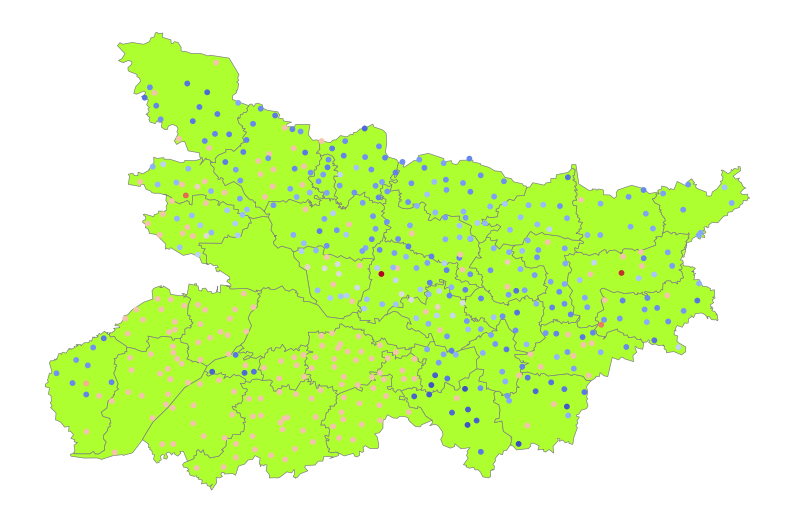

In [106]:
fig, ax = plt.subplots(figsize=(10, 10))

norm = Normalize(vmin=data['pm25'].min(), vmax=data['pm25'].max())

# colors = ['darkblue', 'darkred']  # White to Dark Red
cmap = cm.coolwarm

bihar.plot(ax=ax, color='greenyellow', edgecolor='grey', linewidth=0.5)
scatter = ax.scatter(data['long'], data['lat'], c=data['pm25'], cmap=cmap, s=10, norm=norm)

ax.set_axis_off()
plt.show()